In [1]:
import numpy as np
import pandas as pd 
Data=pd.read_excel('C:\\Users\\asus\\OneDrive\\Documents\\Anvesh_project\\datageneration.xlsx')

In [2]:
data1=Data.iloc[:,1:5]
from sklearn.preprocessing import MinMaxScaler      
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1.values) 

In [3]:
x = scaled_data[:,0:3]
y = scaled_data[:,3]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15, random_state=0) 

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
net = Sequential()
net.add(Dense(90,input_dim=3,activation='linear'))      
net.add(Dense(100,activation='relu'))                    
net.add(Dense(90,activation ='relu'))
net.add(Dense(90,activation= 'relu'))
net.add(Dense(1,activation='relu'))

In [8]:
net.compile(optimizer = 'adam', loss = 'MSE')

In [9]:
print(net.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 90)                360       
                                                                 
 dense_6 (Dense)             (None, 100)               9100      
                                                                 
 dense_7 (Dense)             (None, 90)                9090      
                                                                 
 dense_8 (Dense)             (None, 90)                8190      
                                                                 
 dense_9 (Dense)             (None, 1)                 91        
                                                                 
Total params: 26,831
Trainable params: 26,831
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
history = net.fit(x_train, y_train, epochs = 750, validation_split=0.15)

Epoch 1/750
91/91 [==============================] - 3s 10ms/step - loss: 0.0169 - val_loss: 0.0139
Epoch 2/750
91/91 [==============================] - 1s 6ms/step - loss: 0.0122 - val_loss: 0.0129
Epoch 3/750
91/91 [==============================] - 1s 7ms/step - loss: 0.0109 - val_loss: 0.0100
Epoch 4/750
91/91 [==============================] - 1s 7ms/step - loss: 0.0099 - val_loss: 0.0121
Epoch 5/750
91/91 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 6/750
91/91 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0100
Epoch 7/750
91/91 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.0089
Epoch 8/750
91/91 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 9/750
91/91 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0078
Epoch 10/750
91/91 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0055
Epoch 11

In [11]:
from sklearn.metrics import r2_score
y_train_pre = net.predict(x_train)
r2_train = r2_score(y_train, y_train_pre)
r2_train

107/107 [==============================] - 2s 4ms/step


0.9975712094412565

In [12]:
y_test_pre=net.predict(x_test)
r2_test = r2_score(y_test, y_test_pre)
r2_test

19/19 [==============================] - 0s 2ms/step


0.9963028957637146

In [13]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_train_pre)
mse_train

5.1409948775405295e-05

In [14]:
mse_test=mean_squared_error(y_test, y_test_pre)
mse_test

8.683820129706703e-05

In [15]:
from matplotlib import pyplot as p

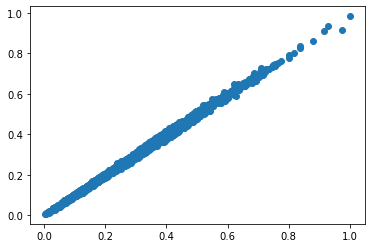

In [16]:
p.scatter(y_train, y_train_pre)

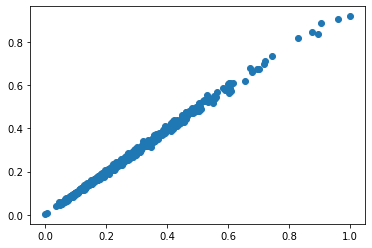

In [17]:
p.scatter(y_test, y_test_pre)